In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

from modules.read_spreadsheet import read_file_xlsx
from modules.get_general_informations import get_informations
from modules.plots import save_fig

#Defautl configurations for the plots
plt.close('all')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['cmr10']
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# Input and output paths    
path_xlsx = os.getcwd() + '/data/spreadsheets/'
path_dss = os.getcwd() + '/data/dss_files/'	
output_csv = os.getcwd() + '/data/output/csv/'
output_img = os.getcwd() + '/data/output/img/'
path_generators = os.getcwd() + '/data/generators_profiles/'


In [9]:
# Read the data
kind = 'Simple' 
load = pd.read_csv(output_csv + f'load_{kind}.csv')
generation = pd.read_csv(output_csv + f'generation_{kind}.csv')
demand = pd.read_csv(output_csv + f'demand_{kind}.csv')
bess_df = pd.read_csv(output_csv + f'bess_powers_{kind}.csv')

# Read the file and
name_spreadsheet = 'teste_sheet.xlsx' # Name of your spreadsheet with parameters of the system in directory data/spreadsheets
file_contents = read_file_xlsx(path_xlsx+name_spreadsheet)
general_informations = file_contents['General']
general_informations = get_informations(general_informations)
date_ini = general_informations.start_date
date_end = general_informations.end_date
interval = general_informations.timestep
time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')

C:\Users\joao9\AppData\Local\Temp\ipykernel_26744\866269131.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')


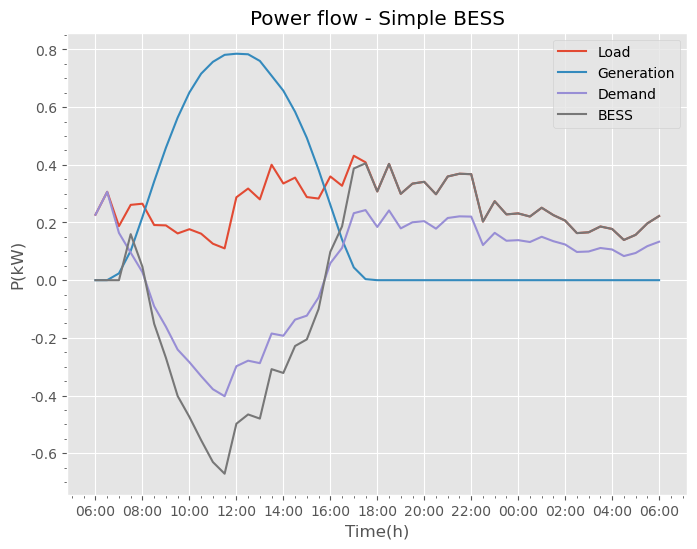

In [10]:
#Extract the timestep from power_df
load = load['P(kW)']
generation = generation['P(kW)']
demand_bess = demand['P(kW)']
bess_power = bess_df.loc[:, 'P(kW)']

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title(f'Power flow - {kind} BESS')
plt.plot(time, load, label='Load')
plt.plot(time, generation, label='Generation')
plt.plot(time, demand_bess, label='Demand')
plt.plot(time, bess_power, label='BESS')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('P(kW)')
plt.grid(True)

# Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

# save_fig(fig,'power_bess_simple',output_img)




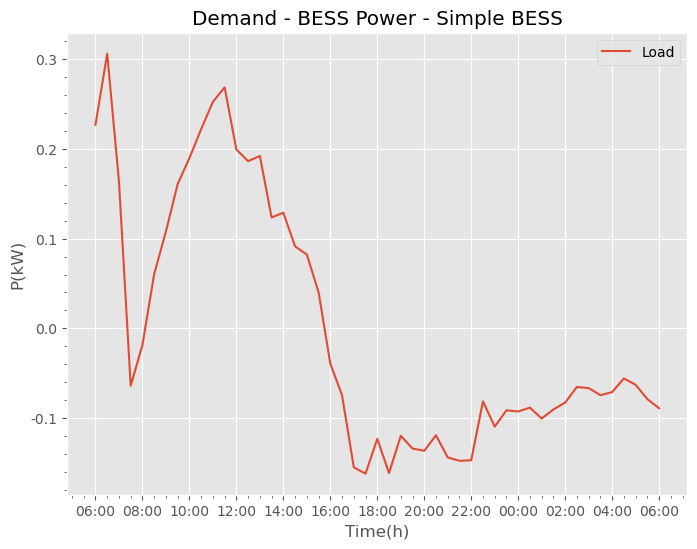

In [13]:
diff = demand_bess - bess_power
fig = plt.figure(figsize=(8,6))
plt.title(f'Demand - BESS Power ')
plt.plot(time, diff)

plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('P(kW)')
plt.grid(True)

# Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

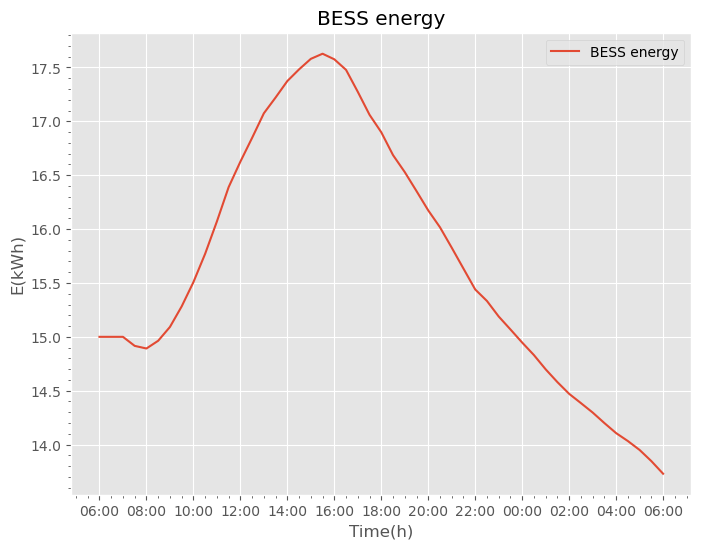

In [11]:
bes_energy = bess_df.loc[:, 'E(kWh)']

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title('BESS energy')
plt.plot(time, bes_energy, label='BESS energy')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('E(kWh)')
plt.grid(True)

# Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

# save_fig(fig,'bess_energy_simple',output_img)

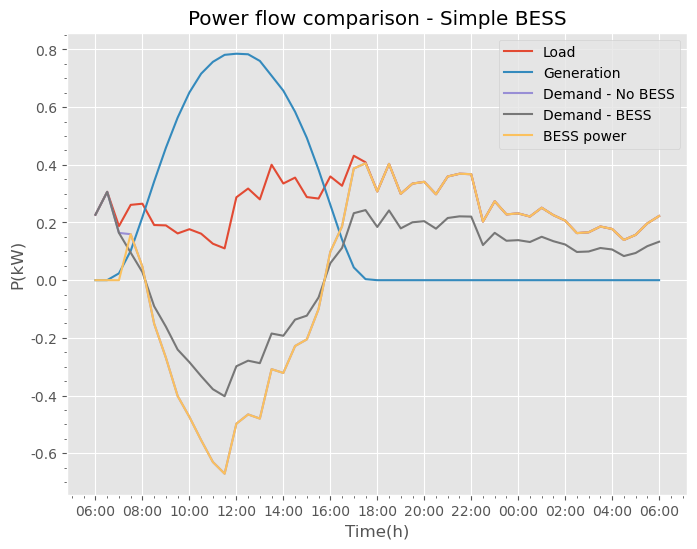

In [12]:
power_no_bess = pd.read_csv(output_csv + 'demand_NoOperation.csv')
demand_no_bess = power_no_bess['P(kW)'].values

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title('Power flow comparison - Simple BESS')
plt.plot(time, load, label='Load')
plt.plot(time, generation, label='Generation')
plt.plot(time, demand_no_bess, label='Demand - No BESS')
plt.plot(time, demand_bess, label='Demand - BESS')
plt.plot(time, bess_power, label='BESS power')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('P(kW)')
plt.grid(True)

# Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

# save_fig(fig,'power_compar_simple',output_img)

